In [234]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Loading the data from the file

#df = pd.read_csv('C:\\Users\\Saira\\Desktop\ML\\Individual_Assignment-Project\\owid-covid-data2.csv')
df = pd.read_csv('W:\\um\Machine Learning\\INdividual Assignment Part1\\owid-covid-data2.csv')

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,ZWE,Africa,Zimbabwe,29/11/2020,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60476,ZWE,Africa,Zimbabwe,30/11/2020,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60477,ZWE,Africa,Zimbabwe,1/12/2020,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60478,ZWE,Africa,Zimbabwe,2/12/2020,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [235]:
df.describe
# It has 50 columns and 60480 rows- we would filter for the required columns only
# get columns 'iso_code','location','date','total_cases','new_cases','total_tests','new_tests'
# There are 60480 rows x 50 columns


<bound method NDFrame.describe of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan   23/1/2020          NaN        0.0   
1          AFG      Asia  Afghanistan   24/1/2020          NaN        0.0   
2          AFG      Asia  Afghanistan   25/1/2020          NaN        0.0   
3          AFG      Asia  Afghanistan   26/1/2020          NaN        0.0   
4          AFG      Asia  Afghanistan   27/1/2020          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
60475      ZWE    Africa     Zimbabwe  29/11/2020       9822.0        0.0   
60476      ZWE    Africa     Zimbabwe  30/11/2020       9950.0      128.0   
60477      ZWE    Africa     Zimbabwe   1/12/2020      10129.0      179.0   
60478      ZWE    Africa     Zimbabwe   2/12/2020      10129.0        0.0   
60479      ZWE    Africa     Zimbabwe   3/12/2020      10424.0      295.0   

       new_cases_smoothed  total_deaths  

In [236]:
#extracting the required columns only
df=df[['iso_code','location','date','total_cases','new_cases','total_tests','new_tests']]
df
#60480 rows × 7 columns
#Filtered the columns required

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
0,AFG,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN
1,AFG,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN
2,AFG,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN
3,AFG,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN
4,AFG,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
60475,ZWE,Zimbabwe,29/11/2020,9822.0,0.0,168212.0,965.0
60476,ZWE,Zimbabwe,30/11/2020,9950.0,128.0,169009.0,797.0
60477,ZWE,Zimbabwe,1/12/2020,10129.0,179.0,170038.0,1029.0
60478,ZWE,Zimbabwe,2/12/2020,10129.0,0.0,171900.0,1862.0


In [237]:
df.info(verbose=True)
#Checking the dattypes of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 7 columns):
iso_code       60164 non-null object
location       60478 non-null object
date           60480 non-null object
total_cases    51743 non-null float64
new_cases      60356 non-null float64
total_tests    24032 non-null float64
new_tests      23861 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


In [238]:
#chehck for null and not null values in the dataset


print('Count of Null values is {} and Not null values is {}'.format(df.isnull().sum().sum(),df.notnull().sum().sum()))


Count of Null values is 82246 and Not null values is 341114


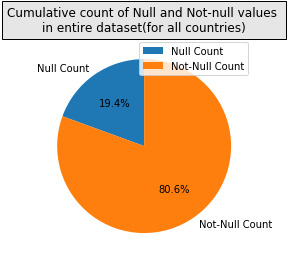

In [239]:
#Plotting Null and Not null values
import matplotlib.pyplot as plt
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values which need to be cleaned up.
plt.title("Cumulative count of Null and Not-null values \n" + "in entire dataset(for all countries)", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


### Data Cleanup for country Malaysia

In [240]:
#'location' column has  null, and missing country name
df[df['location'].isnull()==True]
# 2 rows have Location as Null 

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32635,MYS,NaN,7/2/2020,12.0,0.0,0.0,0.0
32636,MYS,NaN,8/2/2020,16.0,4.0,0.0,0.0


In [241]:
#'iso_code' column has  null, and missing country name

df[df['iso_code'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
24403,NaN,International,23/1/2020,NaN,0.0,NaN,NaN
24404,NaN,International,24/1/2020,NaN,0.0,NaN,NaN
24405,NaN,International,25/1/2020,NaN,0.0,NaN,NaN
24406,NaN,International,26/1/2020,NaN,0.0,NaN,NaN
24407,NaN,International,27/1/2020,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
24714,NaN,International,29/11/2020,721.0,0.0,NaN,NaN
24715,NaN,International,30/11/2020,721.0,0.0,NaN,NaN
24716,NaN,International,1/12/2020,721.0,0.0,NaN,NaN
24717,NaN,International,2/12/2020,721.0,0.0,NaN,NaN


In [242]:
#If iso_code and location is null then delete the record
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] is None :#'location' column has  null, and missing values
        if df.loc[index, 'iso_code'] is None :#'iso_code' column has  null, and missing values
            df.drop(index)#Delete the data record
print('Dropped records where location and iso_code is null')

Dropped records where location and iso_code is null


In [243]:
#Correct invalid iso_code values for location Malaysia
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] =='Malaysia' :#'location' is Malaysia
        if df.loc[index, 'iso_code']!='MYS' :#'iso_code' not equal to MYS
            df.loc[index, 'iso_code']='MYS'
print('Replaced invalid iso_code values for location Malaysia')

Replaced invalid iso_code values for location Malaysia


In [244]:
#Correct invalid location values for iso_code MYS
for index, row in df.iterrows(): 
    if df.loc[index, 'iso_code'] =='MYS' :#'iso_code' is MYS
        if df.loc[index, 'location']!='Malaysia' :#'location' not equal to Malaysia
            df.loc[index, 'location']='Malaysia'
print('Replaced invalid location values for iso_code MYS ')

Replaced invalid location values for iso_code MYS 


In [245]:
#We filter records for location = Malaysia
df=df[df['iso_code']=='MYS']

df


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32620,MYS,Malaysia,23/1/2020,1.0,1.0,0.0,0.0
32621,MYS,Malaysia,24/1/2020,2.0,1.0,0.0,0.0
32622,MYS,Malaysia,25/1/2020,3.0,3.0,0.0,0.0
32623,MYS,Malaysia,26/1/2020,4.0,1.0,0.0,0.0
32624,MYS,Malaysia,27/1/2020,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
32931,MYS,Malaysia,29/11/2020,64485.0,1309.0,2650368.0,15370.0
32932,MYS,Malaysia,30/11/2020,65697.0,1212.0,2667756.0,17388.0
32933,MYS,Malaysia,1/12/2020,67169.0,1472.0,2686452.0,18696.0
32934,MYS,Malaysia,2/12/2020,68020.0,851.0,2707207.0,20755.0


For Malaysia total count of null values is 48 and not null values is 2164 


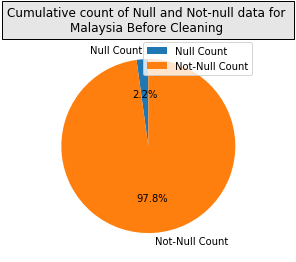

In [246]:
# Checking for NULL values in all columns for location = Malaysia
print('For Malaysia total count of null values is {} and not null values is {} '.format(df.isnull().sum().sum(),df.notnull().sum().sum()))

counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data for \n" + "Malaysia Before Cleaning ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

In [247]:
#Check for null values for location=Malaysia
df.isnull().sum()

if df.isnull().sum().sum()==0:
    print('Dataset has no null values')
else:
    print('dataset has {} null values . Kindly handle it'.format(df.isnull().sum().sum()))

dataset has 48 null values . Kindly handle it


In [248]:
#Check for datatype for each of column in data 
if df.dtypes['new_tests']!= np.float64:
    print('Invalid data in columns new_tests')
else:
    print('Column new_tests datatype is fine')
    
if df.dtypes['total_cases']!= np.float64:
    print('Invalid data in columns total_cases')
else:
    print('Column total_cases datatype is fine')
    
if df.dtypes['new_cases']!= np.float64:
    print('Invalid data in columns new_cases')
else:
    print('Column new_cases datatype is fine')
    
if df.dtypes['total_tests']!= np.float64:
    print('Invalid data in columns total_tests')
else:
    print('Column total_tests datatype is fine')
    
if df.dtypes['iso_code']!= np.object:
    print('Invalid data in columns iso_code')
else:
    print('Column iso_code datatype is fine')
    
if df.dtypes['location']!= np.object:
    print('Invalid data in columns location')
else:
    print('Column location datatype is fine')
    
if df.dtypes['date']!= np.object:
    print('Invalid data in columns date')
else:
    print('Column date datatype is fine')

Column new_tests datatype is fine
Column total_cases datatype is fine
Column new_cases datatype is fine
Column total_tests datatype is fine
Column iso_code datatype is fine
Column location datatype is fine
Column date datatype is fine


Column new_cases has 1 null values . Kindly handle it


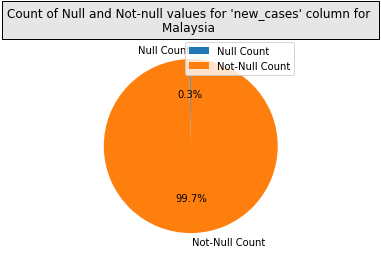

In [250]:
# Checking if 'new_cases' column has`  null, and missing value
df_temp=df[df['new_cases'].isnull()==True]

if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))

df_temp

#Graphical representation of checking 'if 'new_cases' column has`  null, and missing value

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [251]:
#Check and clean data for column 'new_cases' with null and missing value
import math

for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_cases']):#'new_cases' column has  null, and missing values
        if np.isnan(df.loc[index, 'total_cases']):#'total_cases' column has  null, and missing values
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_cases'] =  df.loc[index , 'total_cases']-df.loc[(index - 1), 'total_cases']
            #Arrange df as per 'total_cases' column in ascending order new_cases' = current 'total_cases' value - previous 'total_cases' value


In [252]:
#Check and confirm if column 'new_cases' has no null values
if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))


Column new_cases has no null values


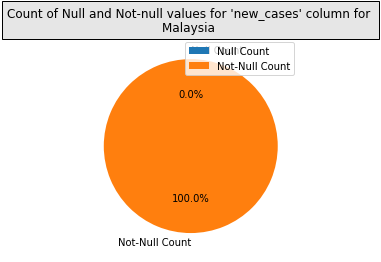

In [253]:
#Graphical representation of checking 'if 'new_cases' column has`  null, and missing value   post cleaning 

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column   post cleaning for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Column new_tests has 47 null values . Kindly handle it


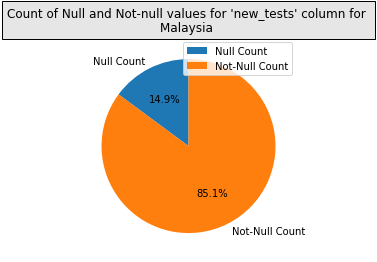

In [254]:
#Check if column 'new_tests' has  null values

df[df['new_tests'].isnull()==True]
if df['new_tests'].isnull().sum()==0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has`  null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [255]:
#Clean data for column 'new_tests' with null and missing value
for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_tests']):#'new_tests' column has   null, and missing values
        if np.isnan(df.loc[index, 'total_tests']) or df.loc[index, 'total_tests']==0.0:#'total_tests' column has null, and missing values
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_tests'] =  df.loc[index , 'total_tests']-df.loc[(index - 1), 'total_tests']
# Arrange df as per 'total_tests' column in ascending order new_tests' = current 'total_tests' value - previous 'total_tests' value 

Column new_tests has no null values


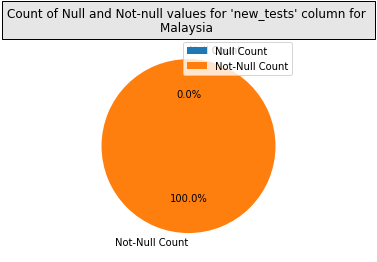

In [256]:
#Check if column new_tests has null values after cleaning

if df['new_tests'].isnull().sum()==0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has`  null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column  post cleaning for \n" + "Malaysia", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Dataset has no null values


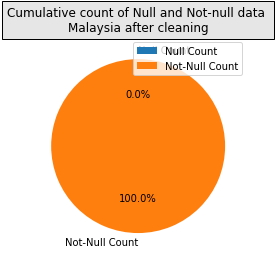

In [258]:
#Check if dataset has null values for any of required columns

if df.isnull().sum().sum()==0:
    print('Dataset has no null values')
else:
    print('Dataset have {} null values . Kindly handle it'.format(df.isnull().sum().sum()))

#Graphical representation of checking 'if dataset has`  null, and missing value
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data \n" + "Malaysia after cleaning", bbox={'facecolor':'0.9', 'pad':5})
plt.show()
#No Null records present

In [261]:
#Convert String data to date datatype for time series calcualtion
##converting 'date' column to type 'datetime' so that indexing can happen later

df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

### DATA Cleaning Complete since there are no null values in required columns - iso_code, location, date, total_cases, new_cases, total_tests, new_tests



# Start with Model Building

In [262]:
#Augmented Dickey–Fuller test (adf) is used in statistics and econometrics and it tests the null hypothesis
#that a unit root is present in a time series sample
#ADF: if the p-value is less than the critical value, the series is stationary
#create Method for ADF
from statsmodels.tsa.stattools import adfuller
def print_adf_result(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [263]:
#Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable 
#time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root
#KPSS: if the p-value is less than the critical value, the series is stationary

#define function for kpss test
from statsmodels.tsa.stattools import kpss
def print_kpss_result(timeseries):
    print ('Results of KPSS Test is as under:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


In [264]:
df['date'].min(),df['date'].max()
#the date range of dta would e printed
#df

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-12-03 00:00:00'))

In [265]:
#Set standard for matplot parameters
import matplotlib as mpl

def set_plot_colour(COLOR):
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#set colour
COLOR = 'pink'
set_plot_colour(COLOR)

### Objective 1:
Considering current trend of COVID-19 cases in Malaysia, I want to determine if Malaysia could achieve 14 days average of below 100 cases/day within the next 3 months(Cumulative count of new cases over 14 consecutive days should be less than 1400).


In [266]:
df_cases=df[['date','new_cases']]
#set index the data frame by ‘Date 
df_cases=df_cases.set_index('date')

In [267]:
#aggregate the data from daily to Weekly in order to carry out the analysis
cases_ts_weekly_avg = df_cases['new_cases'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
cases_ts_weekly_avg

date
2020-01-26       1.500000
2020-02-02       0.571429
2020-02-09       1.142857
2020-02-16       0.857143
2020-02-23       0.000000
2020-03-01       1.000000
2020-03-08      10.000000
2020-03-15      47.000000
2020-03-22     125.428571
2020-03-29     166.285714
2020-04-05     170.285714
2020-04-12     145.857143
2020-04-19     100.857143
2020-04-26      55.857143
2020-05-03      74.000000
2020-05-10      51.142857
2020-05-17      34.000000
2020-05-24      50.142857
2020-05-31      82.000000
2020-06-07      71.857143
2020-06-14      18.714286
2020-06-21      17.000000
2020-06-28       8.857143
2020-07-05       4.142857
2020-07-12       7.857143
2020-07-19       8.714286
2020-07-26      16.857143
2020-08-02      14.571429
2020-08-09      12.000000
2020-08-16      16.714286
2020-08-23       9.571429
2020-08-30       9.571429
2020-09-06       9.000000
2020-09-13      74.000000
2020-09-20      43.428571
2020-09-27     100.000000
2020-10-04     208.857143
2020-10-11     468.000000
2020-10

In [280]:
X = cases_ts_weekly_avg
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 46
Training Observations: 32
Testing Observations: 14


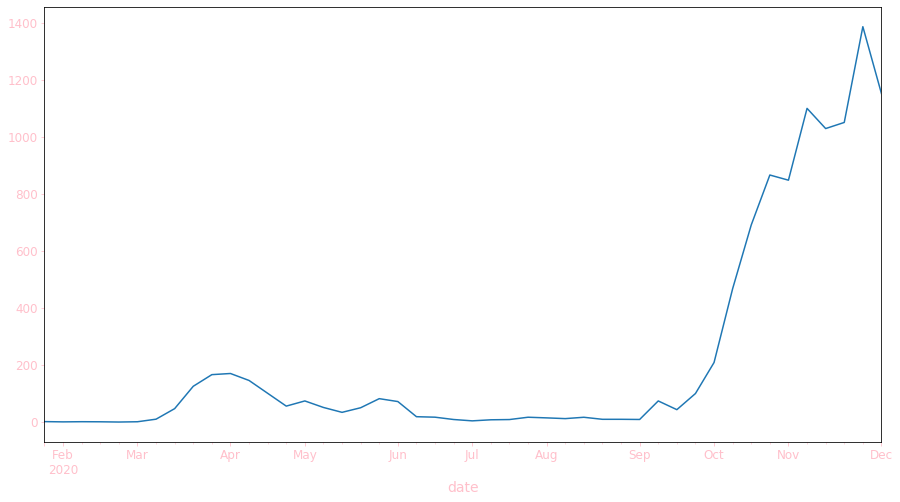

In [281]:
#Plotting the series
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

cases_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

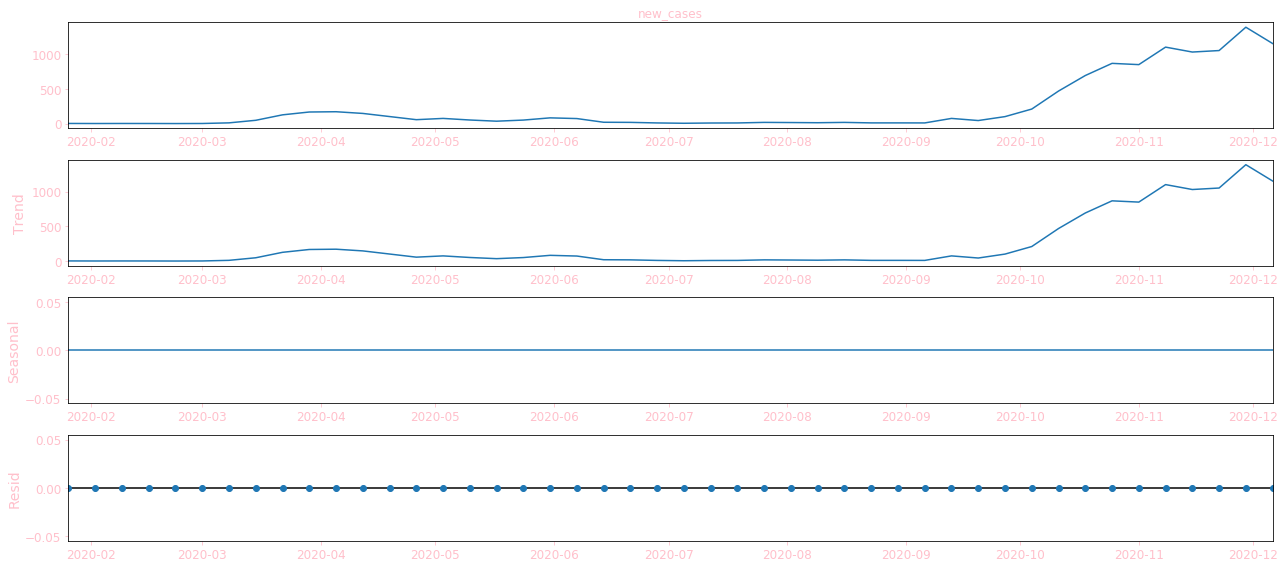

In [282]:
#decomposed time series to get components Trend, Seasonality &  Noise
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

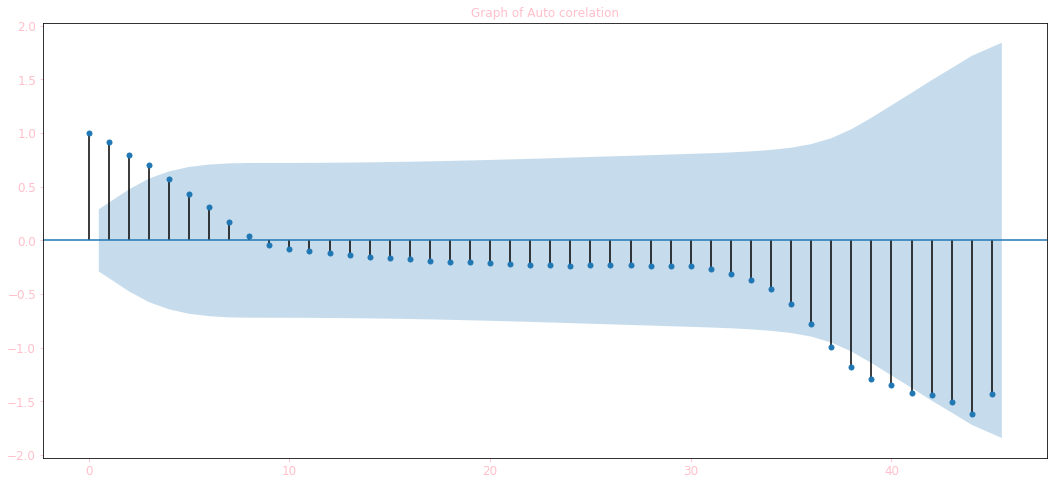

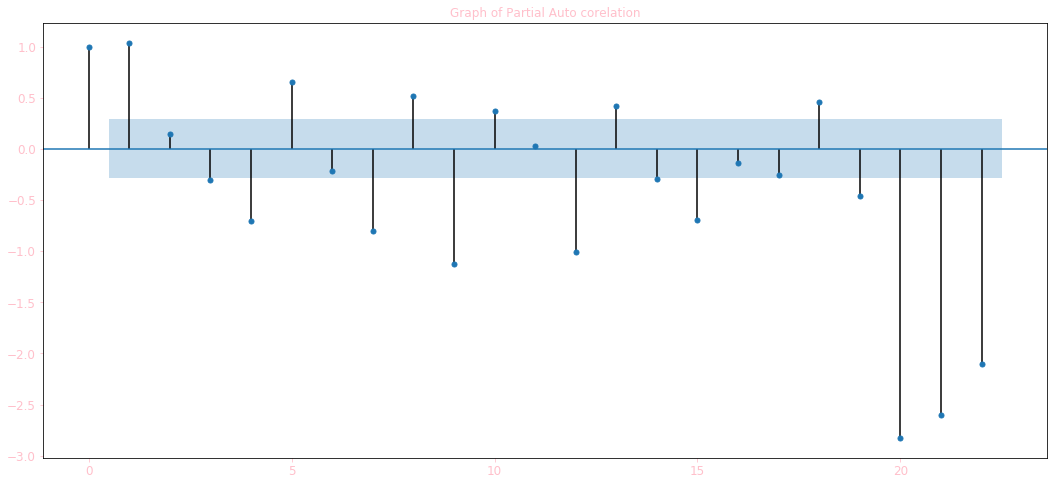

In [303]:
# Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) Plot of the Trend and Seasonally adjusted Time Series data
#to determine  p and seasonal P, q and seasonal Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot the autocorrelation function

plot_acf(cases_ts_weekly_avg,use_vlines=True,adjusted=True,title='Graph of Auto corelation', lags=45)
mpl.pyplot.show()
#The trendwas initially decreasing in initial few weeks and then it started increasing . The change in trend results in change in corelation.
#ACF plot Spikes at lag =1 means a probable Autoregressive(AR)  order of 1 and seasonal AR order of 1

#Plots lags on the horizontal and the partial correlations on vertical axis for time-series data using method='ols'.
plot_pacf(cases_ts_weekly_avg,use_vlines=True,method='ols' ,title='Graph of Partial Auto corelation', lags=22)
mpl.pyplot.show()
#PACF plot spikes at lag=1 and then spikes at lag=10 & lag=20, which means a probable Moving Average(MA) order of 1 or 2 and seasonal MA order of 1 

In [30]:
#apply adf test and kpss test on the series to check whether series is stationery
print(print_adf_result(cases_ts_weekly_avg))
print(print_kpss_result(cases_ts_weekly_avg))
#ADF: if the p-value is less than the critical value , the series is stationary
#P valie is 0.99 whihc is not less than critical value of 0.05 so statistically we can confirm that the series is not stationary.
#Hence, we would do first-order differencing for the trend and re-run the ADF test to check for stationarity.

Results of Dickey-Fuller Test:
Test Statistic                  0.709449
p-value                         0.990025
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.371216
p-value                   0.089562
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [321]:
#Doing First Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(1)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For first oder differencing p =0.15 NOT less than 0.05 so going for second order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -2.363413
p-value                         0.152330
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.283138
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [322]:
#Doing Second Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(2)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.90 NOT less than 0.05 so going for Third order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -0.447880
p-value                         0.901792
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.33223
p-value                   0.10000
Lags Used                10.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [323]:
#Doing Third Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(3)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.41 NOT less than 0.05 so going for Fourth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.741176
p-value                         0.410032
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.322266
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [324]:
#Doing fourth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(4)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.73 NOT less than 0.05 so going for Fifth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.053945
p-value                         0.733085
#Lags Used                      5.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.320102
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [325]:
#Doing Fifth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(5)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.65 NOT less than 0.05 so going for Sixth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.241076
p-value                         0.655681
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.327288
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [327]:
#Doing Sixth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(6)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.001 which is less than 0.05 so the series is now trend stationary

Results of Dickey-Fuller Test:
Test Statistic                 -3.967057
p-value                         0.001593
#Lags Used                      3.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.326064
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\rupes\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


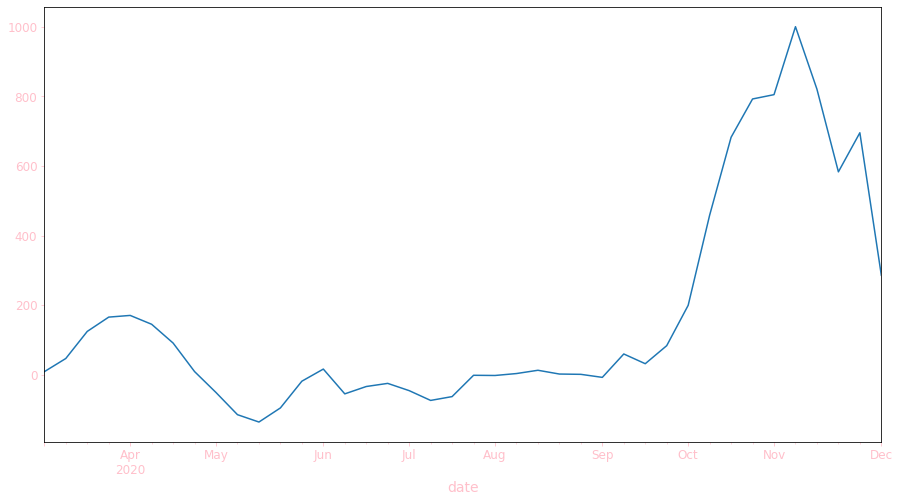

In [357]:
#Plotting the adjuste new_cases
ts_cases_adj.plot(figsize=(15, 8))
plt.show()


In [358]:
#The Adjusted New cases shows sudden drop in new_cases which is not true, rejecteing differencing
ts_cases_adj=cases_ts_weekly_avg

In [359]:
import itertools
import statsmodels.api as sm
#The variables p,P,d,D,q,Q are defined as under
#p and seasonal P: indicate the number of AR terms (lags of the stationary series)
#d and seasonal D: indicate differencing that must be done to stationary series
#q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
#lag: indicates the seasonal length in the data
#setting prameters for SARIMA

p = range(0, 3)
d = range(1,2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]
Examples of parameter combinations for Seasonal SARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [ ]:
#Performing a grid search with the list of possible values around our estimated parameters. We have to  pick the model with the least AIC.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data

Optimization terminated successfully.
         Current function value: 4.447524
         Iterations: 2
         Function evaluations: 40
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:411.17224224197446
Optimization terminated successfully.
         Current function value: 4.447461
         Iterations: 2
         Function evaluations: 45
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:413.1664034249972
Optimization terminated successfully.
         Current function value: 4.443125
         Iterations: 2
         Function evaluations: 68
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:414.7674856392271
Optimization terminated successfully.
         Current function value: 4.443231
         Iterations: 3
         Function evaluations: 145
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:416.77726225783914
Optimization terminated successfully.
         Current function value: 4.447490
         Iterations: 2
         Function evaluations: 44
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:413.1690913907694
Optimization terminated successfully.

In [ ]:
#getting values which has minimum AIC for the time series data
#ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:344.82190383695524

mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=(0, 1, 3),
                                seasonal_order=(0, 1, 0, 12))
#Fitting model using POWELL method: Powell method, is an algorithm proposed  for finding a local minimum of a function
results = mod.fit(method = 'powell')
#Print the results
print(results.summary().tables[1])


In [ ]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_cases_adj)
mpl.pyplot.show()
plot_pacf(ts_cases_adj)
mpl.pyplot.show()

In [ ]:
#Plotting Standard residual for the new_cases, HIstogram plot of the cases and Density plot, Normal Q-Q and corelogram
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
#Valudate the Model versus the actual data
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
#Valudate the Model versus the actual data
pred_ci = pred.conf_int()
ax = ts_cases_adj.plot(label='Observed (Actual)')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()
plt.show()

In [ ]:
#Calculate the predicted results versus actual values
y_forecasted = pred.predicted_mean
y_truth = ts_cases_adj['2020-08-02':]
#Calculate Mean Squared Error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse=round(mse, 2)
print('The Mean Squared Error is {}'.format(mse))
#Calculate Root Mean Squared Error
rmse=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error is {}'.format(rmse))
#Calculate R-squared Error or Coefficient of Determination:The % variation of y on variation with x
from sklearn.metrics import r2_score 
r_squared=r2_score(y_truth, y_forecasted)
print('R-squared Error is {}'.format(r_squared))

#Since the R squared error is approximately 0.85 closer to 1 the model can predict the values of future cases with a narrow margin of error
#prediction model accuracy is 84.48% whihc is acceptable.

In [ ]:
#Future Predict the results for next 16 weeks
pred_uc = results.get_forecast(steps=16)
pred_ci = pred_uc.conf_int()
ax = ts_cases_adj.plot(label='Observed(Actual)', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()




plt.show()
#Since we are preicting weekly average the value is calcualted on every Sunday . The gap in graph shows aperiod between 
#on a gap of a week 06-Dec-2020 to 13-Dec-2020 but there is NO missing values.

In [ ]:
#viewing the predicted results
pred_ci

In [53]:
list(pred_ci.columns.values)


['lower new_cases', 'upper new_cases']

In [ ]:
#red_ci[['lower new_cases', 'upper new_cases']]
pred_ci['lower new_cases']

In [54]:
pred_ci.filter('')
df_result=pred_ci[(pred_ci['lower new_cases'] <=100.0) | (pred_ci['upper new_cases'] <=100.0)]
df_result

,lower new_cases,upper new_cases


In [ ]:
# Check for 2 consecutive weeks

### there is not even a single week where average is less than 100 cases /day
## Based on current trend of data it seems difficult that Malaysia would achieve trend on 100 cases per week in next three months

# Time series analysis for COVID19 Test Kit prediction

In [ ]:
df_new_test=df[['date','new_tests']]
df_new_test

In [ ]:
df_new_test=df_new_test.set_index('date')
df_new_test

In [ ]:
tests_ts_weekly_avg = df_new_test['new_tests'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
tests_ts_weekly_avg

In [ ]:
#show plot
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

tests_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tests_ts_weekly_avg)
mpl.pyplot.show()
#Plot the autocorrelation function
#Plots lags on the horizontal and the correlations on vertical axis.



In [ ]:
plot_pacf(tests_ts_weekly_avg)
mpl.pyplot.show()

import statsmodels.api as sm
from pylab import rcParams

#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg, model='additive')
#decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg)
#fig = decomposition.plot()
plt.show()
#Seasonality not applicable

In [ ]:
#apply adf test on the series
print(print_adf_result(tests_ts_weekly_avg))
print(print_kpss_result(tests_ts_weekly_avg))

In [ ]:
ts_tests_adj = tests_ts_weekly_avg - cases_ts_weekly_avg.shift(1)
#ts_tests_adj =tests_ts_weekly_avg
ts_tests_adj = tests_ts_weekly_avg.dropna()
ts_tests_adj.plot()

In [ ]:
print(print_adf_result(ts_tests_adj))

In [ ]:
#Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_tests_adj)
mpl.pyplot.show()
plot_pacf(ts_tests_adj)
mpl.pyplot.show()

In [ ]:
import itertools

#setting prameters for SARIMA
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [336]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=(2, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

NameError: name 'ts_tests_adj' is not defined

In [ ]:
#Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_tests_adj)
mpl.pyplot.show()
plot_pacf(ts_tests_adj)
mpl.pyplot.show()

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_tests_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New tests')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = ts_tests_adj['2020-08-02':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

df['date'].max()`

In [ ]:
pred_uc = results.get_forecast(steps=16)
pred_ci = pred_uc.conf_int()
ax = ts_tests_adj.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Tests')
plt.legend()
plt.show()

In [ ]:
pred_ci

In [ ]:
pred_ci['kits_required']=pred_ci.mean(axis=1)
pred_ci

## Kits required for next 16 weeks

In [ ]:
pred_ci['kits_required']

In [ ]:
kits_required=pred_ci['kits_required']

## Kits required for next 4 months are as under

In [ ]:
kits_required[0:3].sum(),kits_required[4:7].sum(),kits_required[8:11].sum(),kits_required[12:15].sum()

# ARIMA code 2

In [ ]:
df_new_test=df[['date','new_tests']]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(np.asarray( df_new_test['new_tests']), order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error


X=np.asarray( df_new_test['new_tests'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

In [ ]:
pred_uc = results.get_forecast(steps=16)
pred_ci = pred_uc.conf_int()
ax = ts_cases_adj.plot(label='Observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Tests')
plt.legend()
plt.show()